In [3]:
# Import libraries

import numpy as np # creating and manipulating arrays
import matplotlib.pyplot as plt # visualizing data
import sklearn # regression models
import statsmodels.api as sm 
import pandas as pd
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [4]:
#reading the file
import pandas as pd
df = pd.read_csv("garments_worker_productivity.csv")
df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


In [5]:
# Encoding --> convert categorical into quantitative

df['quarter'] = df['quarter'].astype('category')
df['quarter'] = df['quarter'].cat.codes

df['department'] = df['department'].astype('category')
df['department'] = df['department'].cat.codes

df['day'] = df['day'].astype('category')
df['day'] = df['day'].cat.codes

df['date'] = df['date'].astype('category')
df['date'] = df['date'].cat.codes

In [6]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,0,0,2,3,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,0,0,1,3,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,0,0,2,3,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,0,0,2,3,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,0,0,2,3,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [7]:
df.describe()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,28.879699,1.399332,1.369256,2.534670,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,17.183124,1.215535,0.805909,1.714538,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,14.000000,0.000000,1.000000,1.000000,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,28.000000,1.000000,2.000000,3.000000,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,44.000000,2.000000,2.000000,4.000000,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,58.000000,4.000000,2.000000,5.000000,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [8]:
# Create inputs and output

y = df['actual_productivity']
X = df.drop('actual_productivity',axis=1)
X = df.drop('wip',axis=1)
X

,date,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,0,0,2,3,8,0.80,26.16,7080,98,0.0,0,0,59.0,0.940725
1,0,0,1,3,1,0.75,3.94,960,0,0.0,0,0,8.0,0.886500
2,0,0,2,3,11,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570
3,0,0,2,3,12,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570
4,0,0,2,3,6,0.80,25.90,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,51,1,0,5,10,0.75,2.90,960,0,0.0,0,0,8.0,0.628333
1193,51,1,0,5,8,0.70,3.90,960,0,0.0,0,0,8.0,0.625625
1194,51,1,0,5,7,0.65,3.90,960,0,0.0,0,0,8.0,0.625625
1195,51,1,0,5,9,0.75,2.90,1800,0,0.0,0,0,15.0,0.505889


In [9]:
# a simple linear regression model using Statmodels.
model = sm.OLS(endog= y, exog= X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                 
Dep. Variable:     actual_productivity   R-squared (uncentered):                   1.000
Model:                             OLS   Adj. R-squared (uncentered):              1.000
Method:                  Least Squares   F-statistic:                          3.399e+28
Date:                 Tue, 13 Sep 2022   Prob (F-statistic):                        0.00
Time:                         20:55:16   Log-Likelihood:                          35301.
No. Observations:                 1197   AIC:                                 -7.057e+04
Df Residuals:                     1183   BIC:                                 -7.050e+04
Df Model:                           14                                                  
Covariance Type:             nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------

In [10]:
X = X.drop('date',axis=1)
X = X.drop('department',axis=1)
X = X.drop('targeted_productivity',axis=1)
X = X.drop('team',axis=1)
X = X.drop('smv',axis=1)
X = X.drop('idle_time',axis=1)
X = X.drop('idle_men',axis=1)
X = X.drop('no_of_style_change',axis=1)
X = X.drop('no_of_workers',axis=1)
X

,quarter,day,over_time,incentive,actual_productivity
0,0,3,7080,98,0.940725
1,0,3,960,0,0.886500
2,0,3,3660,50,0.800570
3,0,3,3660,50,0.800570
4,0,3,1920,50,0.800382
...,...,...,...,...,...
1192,1,5,960,0,0.628333
1193,1,5,960,0,0.625625
1194,1,5,960,0,0.625625
1195,1,5,1800,0,0.505889


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

In [14]:
#
reg = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3))
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
#y_pred = pd.DataFrame(y_pred, columns = ['Predictions'])

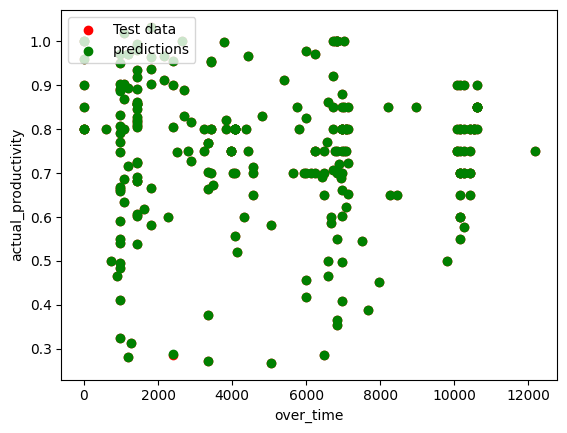

In [16]:
plt.scatter(X_test['over_time'], y_test, color = "red", label = "Test data")
plt.scatter(X_test['over_time'], y_pred, color = "green", label = "predictions")
plt.xlabel("over_time")
plt.ylabel("actual_productivity")
plt.legend(loc="upper left")
plt.show()

In [17]:
val_error = mean_squared_error(y_test, y_pred)

y_train_pred = reg.predict(X_train)
train_error = mean_squared_error(y_train, y_train_pred)

# Get validation scores
scores = cross_validate(reg, X_train, y_train, cv=3)

print("Training MSE: ", train_error)
print("Validation MSE: ", np.mean(scores['test_score']))

score = reg.score(X_test, y_test)
print("R-squared:", score)

Training MSE:  2.389441770134906e-09
Validation MSE:  0.9999978615200446
R-squared: 0.9999999043727142


In [31]:
# Import libraries

import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [32]:
df = pd.read_csv("garments_worker_productivity.csv")

df['quarter'] = df['quarter'].astype('category')
df['quarter'] = df['quarter'].cat.codes

df['department'] = df['department'].astype('category')
df['department'] = df['department'].cat.codes

df['day'] = df['day'].astype('category')
df['day'] = df['day'].cat.codes

df['date'] = df['date'].astype('category')
df['date'] = df['date'].cat.codes


y = df['actual_productivity']
X = df.drop('actual_productivity',axis=1)
X = df.drop('wip',axis=1)
X

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = .2, random_state = 42)

In [33]:
#Polynomial regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)
X_val_poly = poly_features.fit_transform(X_val)


sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X_train_poly, y_train.ravel())
poly_train_pred = sgd_reg.predict(X_train_poly)
poly_test_pred = sgd_reg.predict(X_test_poly)
poly_val_pred = sgd_reg.predict(X_val_poly)

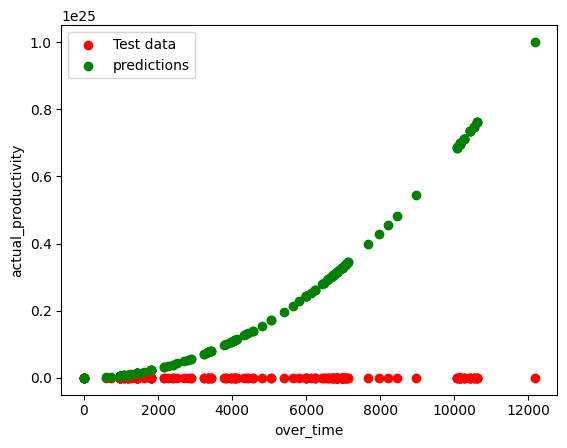

In [34]:
plt.scatter(X_test['over_time'], y_test, color = "red", label = "Test data")
plt.scatter(X_test['over_time'], poly_test_pred, color = "green", label = "predictions")
plt.xlabel("over_time")
plt.ylabel("actual_productivity")
plt.legend(loc="upper left")
plt.show()

In [35]:
val_error = mean_squared_error(y_val, poly_val_pred)
train_error = mean_squared_error(y_train, poly_train_pred)

print("Training MSE: ", train_error)
print("Validation MSE: ", val_error)

score = sgd_reg.score(X_train_poly, y_train)
print("R-squared:", score)

Training MSE:  1.2569826993139664e+49
Validation MSE:  1.1952725318729766e+49
R-squared: -4.008689093744808e+50


In [36]:
#Lasso Regression
lasso = make_pipeline(StandardScaler(), SGDRegressor(alpha=0.0001, epsilon=0.01, eta0=0.1, penalty="l1", max_iter=1000, tol=1e-3, random_state=42))
lasso.fit(X_train, y_train)
lasso_train_pred = lasso.predict(X_train)
lasso_test_pred = lasso.predict(X_test)
lasso_val_pred = lasso.predict(X_val)

val_error = mean_squared_error(y_val, lasso_val_pred)
train_error = mean_squared_error(y_train, lasso_train_pred)

# Get validation scores
scores = cross_validate(lasso, X_train, y_train, cv=3)

print("Training MSE: ", train_error)
print("Validation MSE: ", np.mean(scores['test_score']))

score = lasso.score(X_test, y_test)
print("R-squared:", score)

Training MSE:  73417190634476.56
Validation MSE:  -213938936.24996042
R-squared: -6.798146304707131e+16


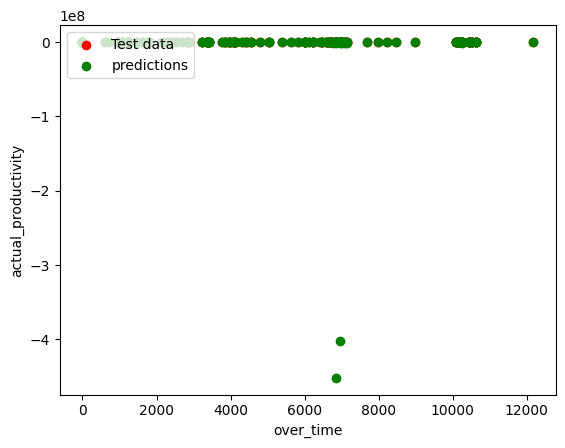

In [37]:
#Ride regression
ridge = make_pipeline(StandardScaler(), SGDRegressor(alpha=0.0001, epsilon=0.01, eta0=0.1, penalty="l2", max_iter=1000, tol=1e-3, random_state=42))
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

plt.scatter(X_test['over_time'], y_test, color = "red", label = "Test data")
plt.scatter(X_test['over_time'], y_pred, color = "green", label = "predictions")
plt.xlabel("over_time")
plt.ylabel("actual_productivity")
plt.legend(loc="upper left")
plt.show()

In [ ]:
#question 8
the best regression is the ridge regression this it has the lowest MSE validation